In [131]:
import json
import re
import ssl

import certifi
import geopy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from geopy import Nominatim

In [155]:
# to potrzebne, bo inaczej wyskakuje GeocoderServiceError, ale ogólnie bardzo niewskazane XD
ssl._create_default_https_context = ssl._create_unverified_context

In [157]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))

In [159]:
pos["Łąg"] = [18.065844820300693, 53.831195018983074]
pos["Radomyśl"] = [ 22.381036085411196, 52.03110791812052]
pos["Jagodin"] = [ 15.169937485645997, 51.35570663746631]
pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]

In [169]:
p = pd.read_csv("data/connections.csv",encoding="utf-8-sig")

In [170]:
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']]))
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()))
unique_connections = p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
unique_connections = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
unique_connections.sort()

183622
1345


In [168]:
unique_connections

[('Augustów', 'Suwałki'),
 ('Barczewo', 'Korsze'),
 ('Biała\xa0Podlaska', 'Międzyrzec\xa0Podlaski'),
 ('Białogard', 'Szczecinek'),
 ('Białystok', 'Sokółka'),
 ('Bobowa-Miasto', 'Bogoniowice\xa0Ciężkowice'),
 ('Bogoniowice\xa0Ciężkowice', 'Tuchów'),
 ('Bohumin\xa0Vrbice', 'Chałupki'),
 ('Brodnica', 'Rypin'),
 ('Brzeg', 'Opole\xa0Główne'),
 ('Byczyna\xa0Kluczborska', 'Kluczbork'),
 ('Bydgoszcz\xa0Główna', 'Inowrocław'),
 ('Będzin\xa0Miasto', 'Sosnowiec\xa0Główny'),
 ('Chałupki', 'Wodzisław\xa0Śląski'),
 ('Chodzież', 'Rogoźno\xa0Wielkopolskie'),
 ('Chorzów\xa0Batory', 'Katowice'),
 ('Chotyłów', 'Biała\xa0Podlaska'),
 ('Czechowice-Dziedzice', 'Bielsko-Biała\xa0Główna'),
 ('Czyżew', 'Szepietowo'),
 ('Częstochowa', 'Myszków'),
 ('Dąbrowa\xa0Białostocka', 'Augustów'),
 ('Dąbrowa\xa0Górnicza', 'Będzin\xa0Miasto'),
 ('Dąbrowa\xa0Górnicza', 'Zawiercie'),
 ('Elbląg', 'Pasłęk'),
 ('Gdańsk\xa0Główny', 'Tczew'),
 ('Gdańsk\xa0Główny', 'Warszawa\xa0Wschodnia'),
 ('Gdańsk\xa0Oliwa', 'Gdańsk\xa0Wrzeszcz

In [148]:
test_trains = p["nazwa_pociagu"].unique()[:2]
test_trains

array(['ECE 41008/9 SILESIA', 'EIJ 1312/3'], dtype=object)

ECE 41008/9 SILESIA
[('Bohumin\xa0Vrbice', 'Chałupki'), ('Chałupki', 'Wodzisław\xa0Śląski'), ('Wodzisław\xa0Śląski', 'Rybnik'), ('Rybnik', 'Tychy'), ('Tychy', 'Katowice'), ('Katowice', 'Sosnowiec\xa0Główny'), ('Sosnowiec\xa0Główny', 'Dąbrowa\xa0Górnicza'), ('Dąbrowa\xa0Górnicza', 'Zawiercie'), ('Zawiercie', 'Włoszczowa\xa0Północ'), ('Włoszczowa\xa0Północ', 'Opoczno\xa0Południe'), ('Opoczno\xa0Południe', 'Warszawa\xa0Gdańska')]
EIJ 1312/3
[('Warszawa\xa0Wschodnia', 'Warszawa\xa0Centralna'), ('Warszawa\xa0Centralna', 'Warszawa\xa0Zachodnia'), ('Warszawa\xa0Zachodnia', 'Kraków\xa0Główny')]


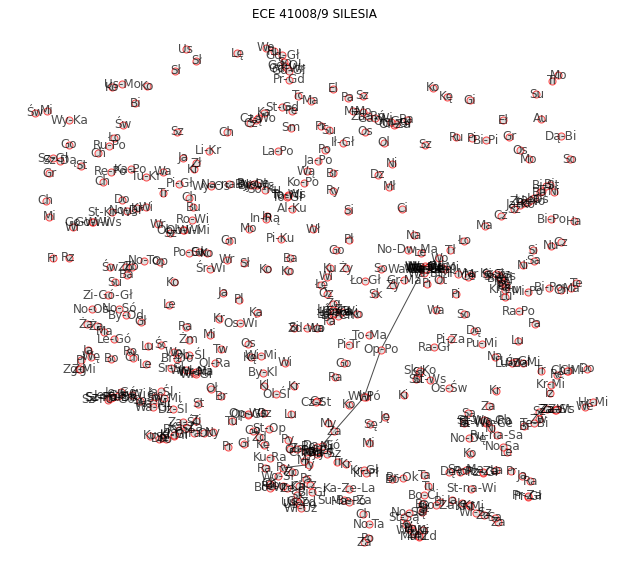

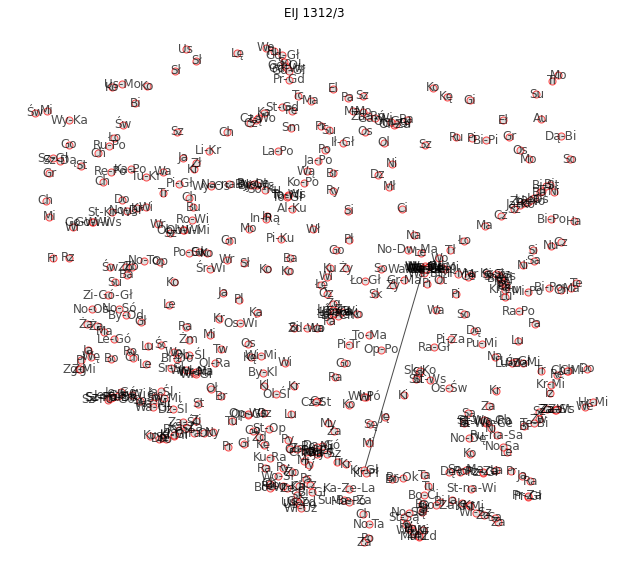

In [160]:
nodes = list(pos.keys())
for train_name in test_trains:
    plt.figure(figsize=(11,10))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    temp_connections = p.loc[p["nazwa_pociagu"]== train_name][['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
    plt.title(train_name)
    edges = [(conn[1],conn[2]) for conn in temp_connections.itertuples()]
    print(train_name)
    print(edges)
    G.add_edges_from( edges )
    labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
    nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray', labels = labels )

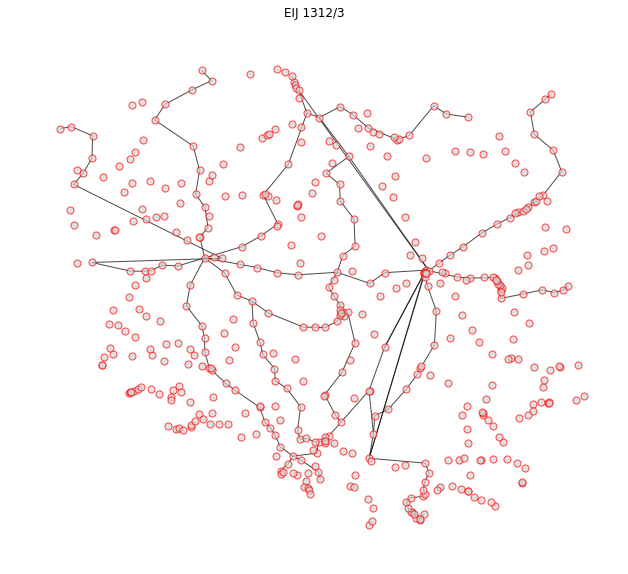

In [161]:
plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
plt.title(train_name)
G.add_edges_from( unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

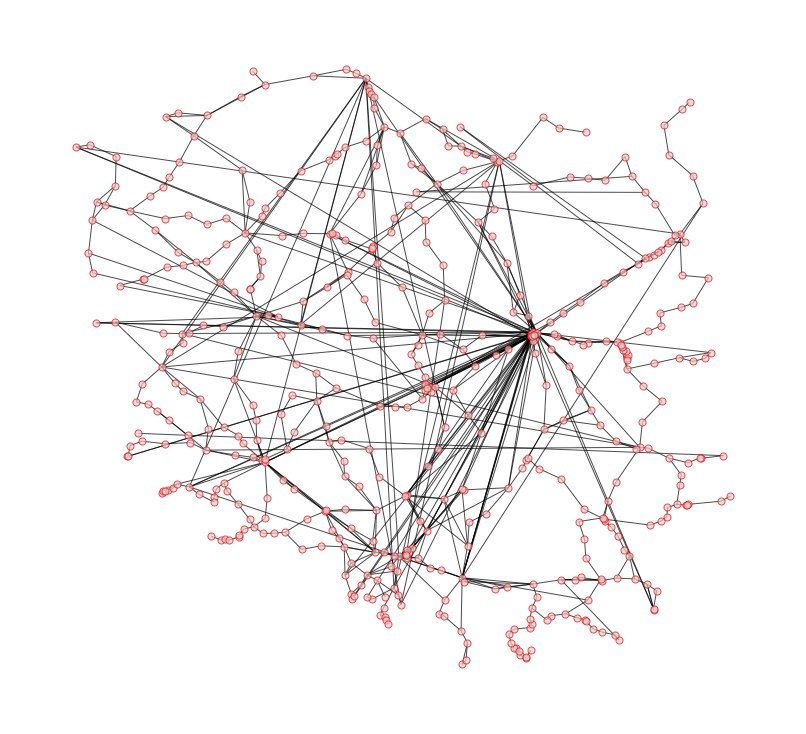

In [171]:
plt.figure(figsize=(11,10))
G = nx.Graph()
#edges = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
G.add_nodes_from(nodes)
G.add_edges_from( unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')